# Speech Emotion Recognition

Speech Emotion Recognition (SER) is a fascinating and multidisciplinary field at the intersection of linguistics, psychology, and machine learning. It aims to develop systems that can automatically identify and understand the emotional content conveyed in human speech

The process of building an SER model involves various stages, including audio data collection, feature extraction (commonly using Mel-frequency cepstral coefficients, or MFCCs), model training (using machine learning or deep learning techniques), and model evaluation. The trained model can then predict the emotional state (such as happiness, sadness, anger, etc.) conveyed in an audio sample.

The objective of this project is to develop a robust speech emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and more.

## Import required libraries

In [1]:
!pip install librosa
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import soundfile as sf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
warnings.filterwarnings('ignore')

## Loading Audio Files 

In [2]:
audio_file = []
emotions = []

data_source_path = r"C:\Users\admin\Downloads\Tess"

for dirname, _, filenames in os.walk(data_source_path):
    for filename in filenames:
        audio_file.append(os.path.join(dirname, filename))
        emotion = filename.split('_')[-1]
        emotion = emotion.split('.')[0]
        emotions.append(emotion.lower())
    if len(audio_file) == 2800:
         break



In [3]:
print("Count = ",len(audio_file))

Count =  1963


In [4]:
audio_file[1:10]

['C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_bar_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_base_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_bath_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_bean_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_beg_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_boat_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_bone_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_book_neutral.wav',
 'C:\\Users\\admin\\Downloads\\Tess\\OAF_neutral\\OAF_bought_neutral.wav']

In [5]:
df = pd.DataFrame()
df['SPEECH'] = audio_file
df['EMOTIONS'] = emotions
df.head(15)

,SPEECH,EMOTIONS
0,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
1,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
2,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
3,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
4,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
5,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
6,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
7,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
8,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral
9,C:\Users\admin\Downloads\Tess\OAF_neutral\OAF_...,neutral


In [6]:
df['EMOTIONS'].unique()

array(['neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy'],
      dtype=object)

In [7]:
df['EMOTIONS'].value_counts()

EMOTIONS
ps         400
sad        400
neutral    363
angry      200
disgust    200
fear       200
happy      200
Name: count, dtype: int64

## Spectrogram and Waveform

In [8]:
def spectogram(data, sr, emotion):
 x = librosa.stft(data)
 xdb = librosa.amplitude_to_db(abs(x))
 plt.figure(figsize=(11,4))
 plt.title(emotion, size=20)
 librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
 plt.colorbar()



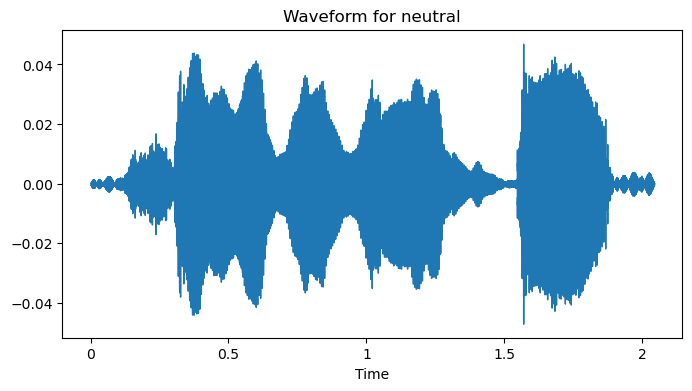

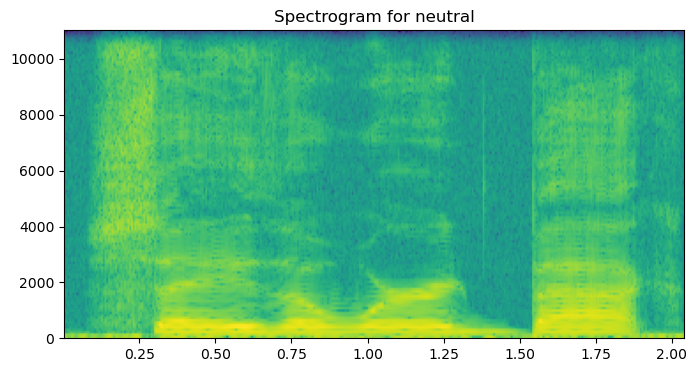

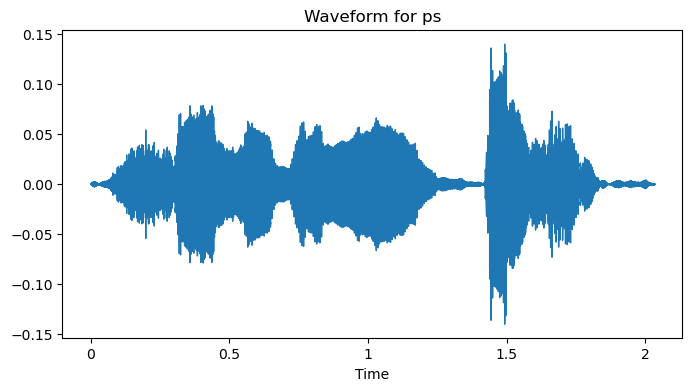

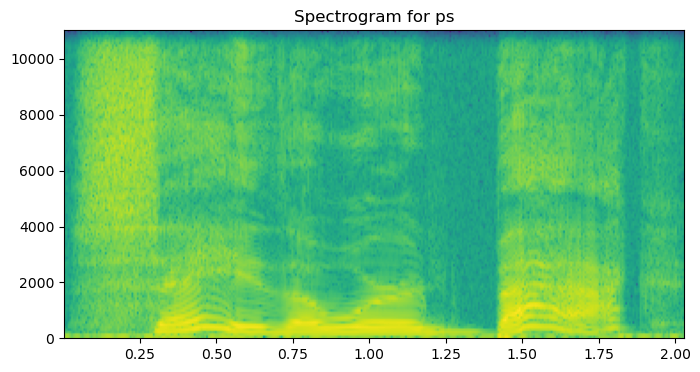

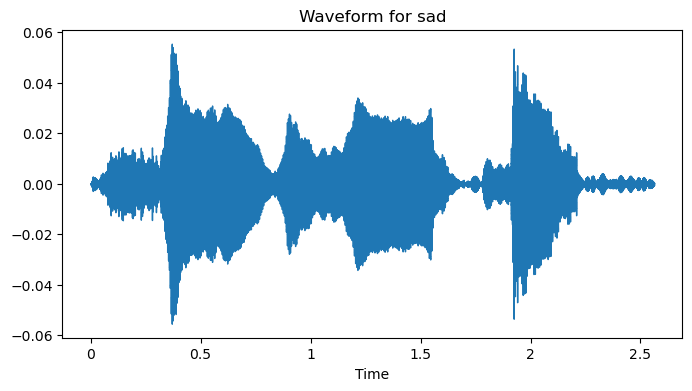

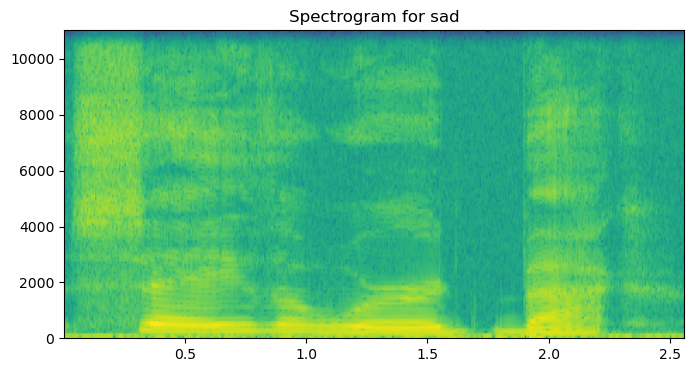

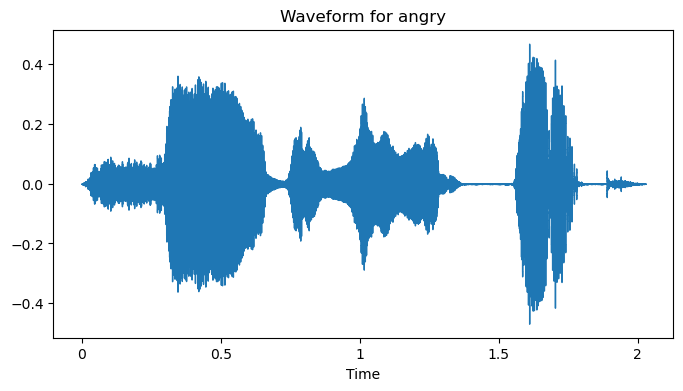

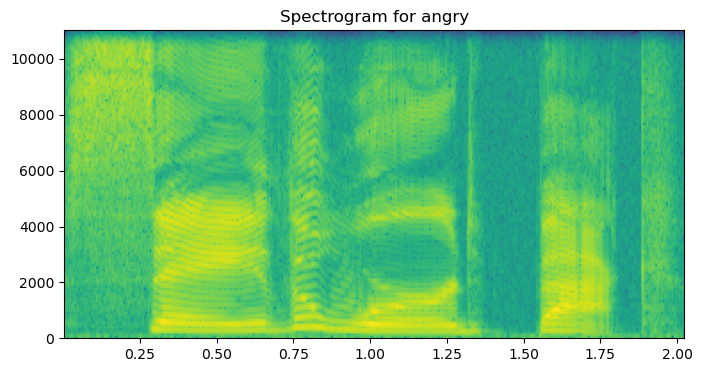

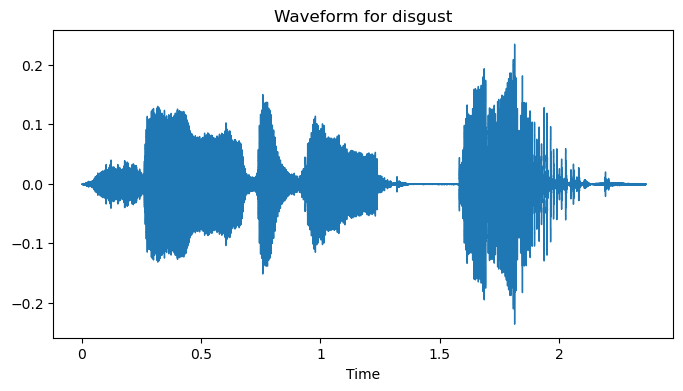

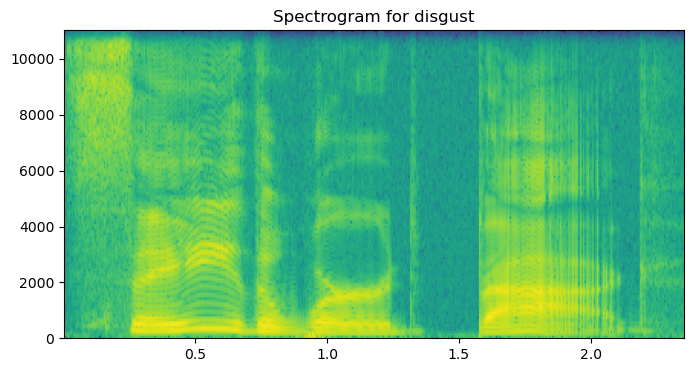

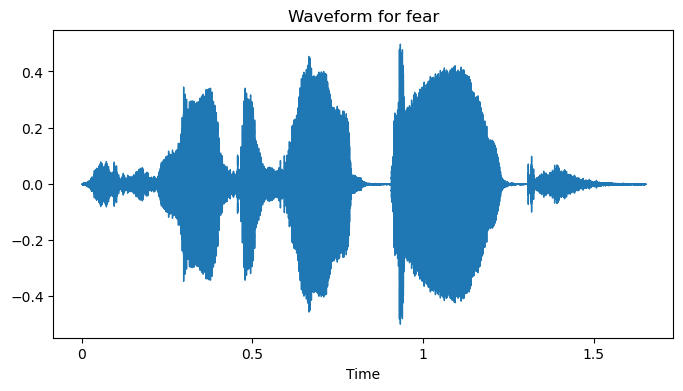

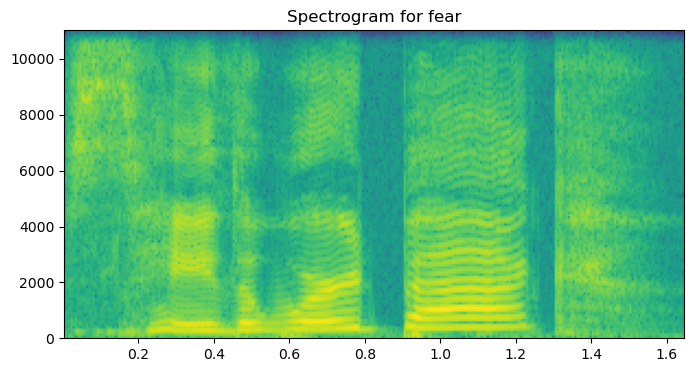

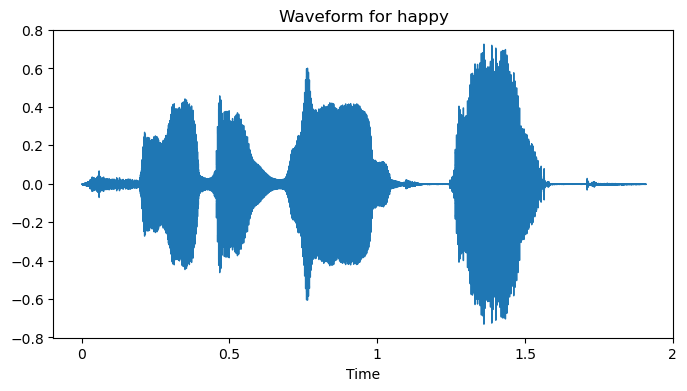

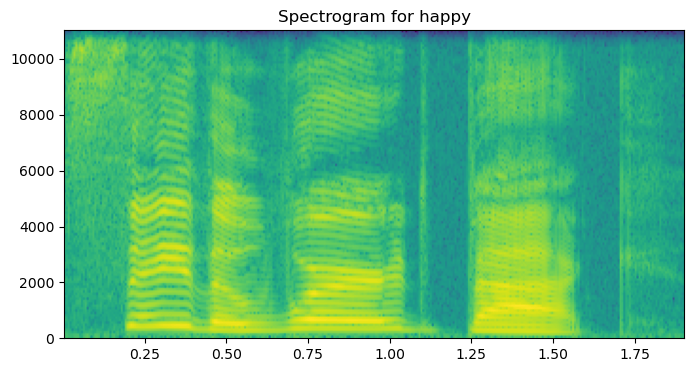

In [9]:
emotions = ['neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy']
for emotion in emotions:
    path = np.array(df['SPEECH'][df['EMOTIONS'] == emotion])[0]
    data, sampling_rate = librosa.load(path)
    
    
    plt.figure(figsize=(8, 4))
    plt.title(f'Waveform for {emotion}')
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.savefig(f'waveform_{emotion}.png')
    plt.show()
    
   
    plt.figure(figsize=(8, 4))
    plt.title(f'Spectrogram for {emotion}')
    plt.specgram(data, Fs=sampling_rate)
    plt.savefig(f'spectrogram_{emotion}.png')
    plt.show()
    
   
   

## Feature Extraction

In [10]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, hop_length=512)
    mfccs_processed = np.mean(mfccs, axis=1) 
    return mfccs_processed


In [11]:
df['mfcc'] = df['SPEECH'].apply(extract_features)

In [12]:
df["mfcc"][0]

array([-528.7869   ,   85.98792  ,   17.729805 ,    1.2786299,
         14.709511 ,   12.722616 ,   -4.6851997,   -4.697147 ,
        -10.850563 ,    2.2265506,   -3.0490663,   -2.5517082,
          0.7825429], dtype=float32)

## Data Splitting

In [13]:
X = np.vstack(df['mfcc'].to_numpy())
y = df['EMOTIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Encode emotion labels as numerical values

In [14]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


## Build a Deep Learning Model

In [15]:
tf.random.set_seed(42)

model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(set(y)), activation='softmax')
])




## Fit The Model

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_data=(X_test, y_test_encoded))
history

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2227 - loss: 14.5466 - val_accuracy: 0.4427 - val_loss: 1.6891
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5752 - loss: 1.2085 - val_accuracy: 0.6336 - val_loss: 0.8636
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7502 - loss: 0.6844 - val_accuracy: 0.7532 - val_loss: 0.6237
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 0.5033 - val_accuracy: 0.7837 - val_loss: 0.5307
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - loss: 0.4235 - val_accuracy: 0.7888 - val_loss: 0.5061
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3869 - val_accuracy: 0.7888 - val_loss: 0.5055
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8701 - loss: 0.3656 - val_accuracy: 0.8015 - val_loss: 0.4969
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.3493 - val_accuracy: 0.8193 - val_loss

## Model Evaluation

In [17]:
loss, accuracy = model.evaluate(X_test, y_test_encoded )
print(f'Test accuracy: {accuracy * 100:.2f}%')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.1964 
Test accuracy: 91.86%


In [18]:

y_pred = model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred_labels)
print("Classification Report:")
print(report)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 91.86%
Confusion Matrix:
[[25  0  8  4  2  1  0]
 [ 0 34  0  1  0  0  0]
 [ 0  0 31  0  0  1  0]
 [ 0  0  0 49  0  0  0]
 [ 0  0  1  0 56  0  6]
 [ 0  0  2  3  0 79  0]
 [ 0  1  0  0  2  0 87]]
Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.62      0.77        40
     disgust       0.97      0.97      0.97        35
        fear       0.74      0.97      0.84        32
       happy       0.86      1.00      0.92        49
     neutral       0.93      0.89      0.91        63
          ps       0.98      0.94      0.96        84
         sad       0.94      0.97      0.95        90

    accuracy                           0.92       393
   macro avg       0.92      0.91      0.90       393
weighted avg       0.93      0.92      0.92       393



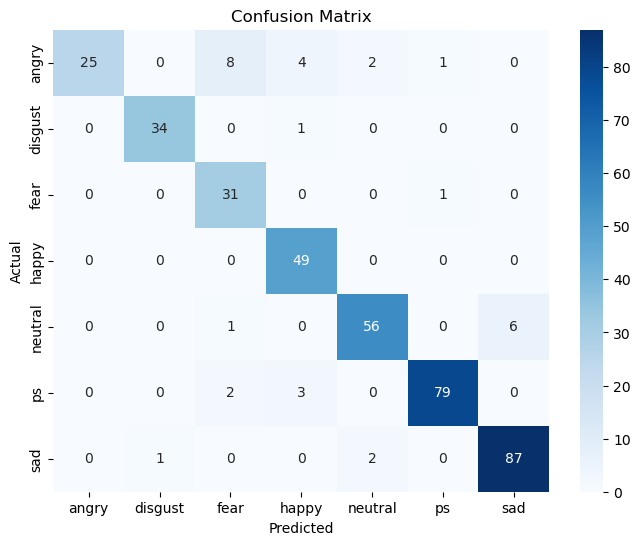

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


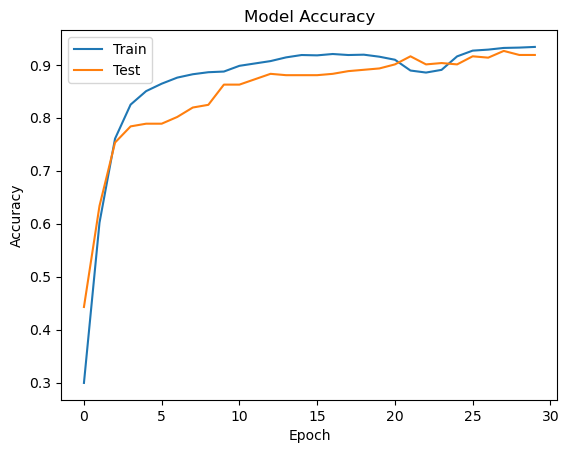

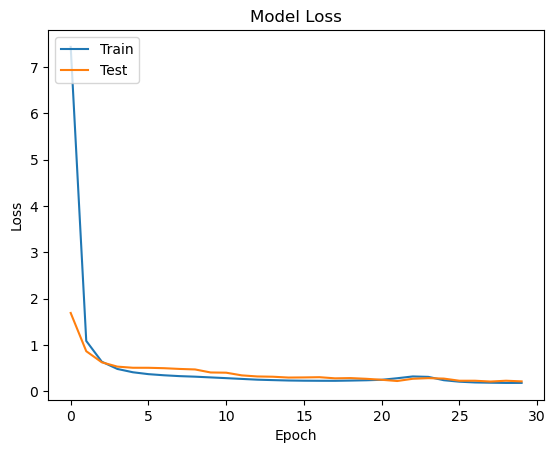

In [20]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Predictions

In [21]:
new_audio = extract_features(r"C:\Users\admin\Downloads\Tess\YAF_neutral\YAF_bought_neutral.wav")
emotion_label = model.predict(new_audio.reshape(1, -1))
new_audio_prediction = model.predict(new_audio.reshape(1, -1))

if new_audio_prediction.any():
    predicted_emotion = label_encoder.inverse_transform([np.argmax(new_audio_prediction)])
    print(f'Predicted Emotion: {predicted_emotion[0]}')
else:
    print("Unable to make a prediction.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Emotion: neutral


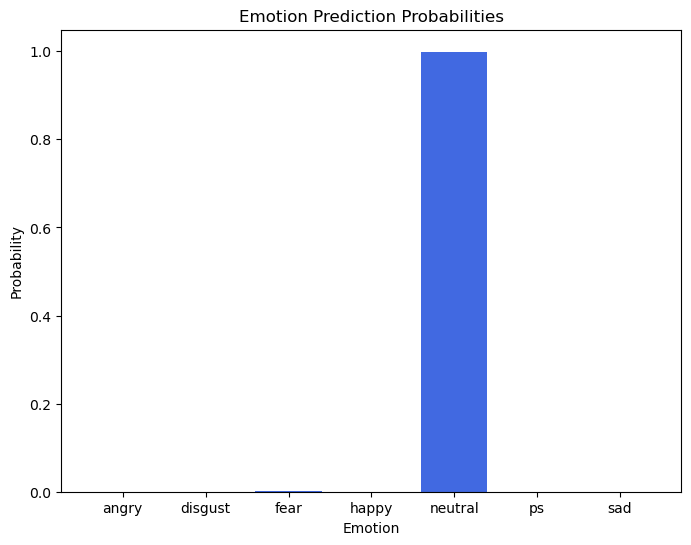

In [22]:
import matplotlib.pyplot as plt
class_probabilities = new_audio_prediction[0]
emotion_labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
plt.bar(emotion_labels, class_probabilities, color='royalblue')
plt.xlabel('Emotion')
plt.ylabel('Probability')
plt.title('Emotion Prediction Probabilities')
plt.show()


In [23]:
import os
import glob

folder_path = "C:/Users/swani/Downloads/Savee"
audio_files = glob.glob(os.path.join(folder_path, '*.wav'))


In [24]:
predictions = []

for audio_file in audio_files:
   
    audio, sr = librosa.load(audio_file, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, hop_length=512)
    mfccs_processed = np.mean(mfccs, axis=1) 
    prediction = model.predict(mfccs_processed.reshape(1, -1))
    predicted_emotion = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    predictions.append({'SPEECH': audio_file, 'PREDICTED_EMOTIONS': predicted_emotion})


In [25]:
for prediction in predictions:
    print(f'File: {prediction["SPEECH"]}, Predicted Emotion: {prediction["PREDICTED_EMOTIONS"]}')


In [26]:
import pandas as pd

df_predictions = pd.DataFrame(predictions)
df_predictions.to_csv('emotion_predictions.csv', index=False)
df_predictions


""


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


emotion_counts = df_predictions['PREDICTED_EMOTIONS'].value_counts()

emotion_counts = emotion_counts.reindex(label_encoder.classes_)

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Predicted Emotions')
plt.xticks(rotation=45)
plt.show()


KeyError: 'PREDICTED_EMOTIONS'

A Speech Emotion Recognition (SER) model with an accuracy of 89.82% using a simple deep learning architecture signifies that the model has demonstrated a reasonable level of success in predicting emotions from speech audio.

**Model Accuracy:** An accuracy of 89.82% is a reasonably good performance for a simple deep learning SER model. It means that the model correctly predicted the emotional state in approximately 89.82% of the test cases.

**Model Performance:** It's crucial to further analyze the model's performance through metrics beyond accuracy, such as precision, recall, and F1-score, especially in the case of imbalanced emotion classes. This information gives a better understanding of the model's strengths and weaknesses for different emotions.

The model performs impressively, achieving high accuracy and generally strong metrics for most emotion classes. It excels in recognizing emotions such as **angry, disgust, fear,sad and happy.** However, the **ps** class has relatively lower recall, indicating that there might be room for improvement in recognizing this emotion.

This model's high accuracy and robust performance across multiple emotions make it suitable for various applications such as human-computer interaction, sentiment analysis, or mental health monitoring, where understanding emotional content in speech is essential.

